In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
ls

 Volume in drive C is OS
 Volume Serial Number is B68C-E808

 Directory of C:\Users\tomek\projekt_polonistyka\Rzeczpospolita 2015-2022

03.05.2023  23:15    <DIR>          .
03.05.2023  23:15    <DIR>          ..
03.05.2023  23:15        22˙355˙456 all_preprocessed.csv
03.05.2023  23:10        22˙317˙038 preprocessed.csv
27.04.2023  08:32         9˙460˙916 Rzeczpospolita (MNIEJSZY) 2015-2022.xlsx
27.04.2023  08:21       470˙819˙104 Rzeczpospolita 2015-2022.xlsx
               4 File(s)    524˙952˙514 bytes
               2 Dir(s)  23˙297˙421˙312 bytes free


In [47]:
data = pd.read_csv('preprocessed.csv')
data.head()

,Unnamed: 0,text
0,0,energetyka jest sprawą zbyt poważną aby decyzj...
1,1,technika niezwykły śmigłowy samolot zasilany w...
2,2,trzeba zachęcić związki zawodowe rozmów nowym ...
3,3,unijna dyplomacja może być dźwignią realizacji...
4,4,maszyna wystartowała kilkanaście minut po rano...


In [33]:
data['len'] = data['text'].apply(lambda x: len(x.split(' ')))


In [34]:
import regex as re

def classify(article):
    patterns = ['ekolog', 'ocieplen', 'środowisk', 'klimat', 'przyrod', 'węg', 'elektr', 'energ', 'cieplar', 'IPCC','efekt cieplar']
    match = 0
    for pattern in patterns:
       match += len(re.findall(pattern, article))

    if match != 0:
        return 1
    else:
        return 0

In [35]:
data['class'] = data['text'].apply(classify)

In [36]:
data['text']

0       energetyka jest sprawą zbyt poważną aby decyzj...
1       technika niezwykły śmigłowy samolot zasilany w...
2       trzeba zachęcić związki zawodowe rozmów nowym ...
3       unijna dyplomacja może być dźwignią realizacji...
4       maszyna wystartowała kilkanaście minut po rano...
                              ...                        
3508    renesans energetyki jądrowej jest faktem dosta...
3509    gdyby zliczyć wszystkie konferencje międzynaro...
3510    badania opinii społecznej nie pozostawiają wąt...
3511    polska scena polityczna wydaje się zacementowa...
3512    ochrona lasów może podwyższyć ceny różnych pro...
Name: text, Length: 3513, dtype: object

<Axes: xlabel='len', ylabel='Count'>

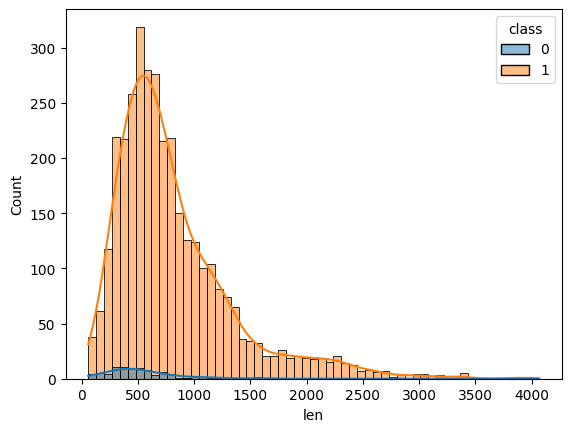

In [37]:
import seaborn as sns

sns.histplot(data=data, x='len',kde=True,hue='class')


In [27]:
print('Potentially interesting ' + str(len(data[data['class'] == 1])))
print('Rather boring ' + str(len(data[data['class'] == 0])))

Potentially interesting 3428
Rather boring 85


In [28]:
data.to_csv('all_preprocessed.csv')